In [1]:
!pip install fastapi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 618.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.4/341.4 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
!pip install pyngrok

In [3]:
!pip install pydantic

In [4]:
!pip install transformers

In [5]:
!pip install accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.1/314.1 kB 8.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [6]:
from transformers import pipeline

In [7]:
from fastapi import FastAPI
from transformers import pipeline, TextClassificationPipeline, RobertaForSequenceClassification, RobertaTokenizer
from typing import Optional
from pydantic import BaseModel
import torch

generation_pipeline = pipeline("text-generation", model="AI-MO/NuminaMath-7B-TIR", torch_dtype=torch.bfloat16, device_map="auto")
messages = [
    {"role": "user", "content": "For how many values of the constant $k$ will the polynomial $x^{2}+kx+36$ have two distinct integer roots?"},
]
prompt = generation_pipeline.tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)

gen_config = {
    "max_new_tokens": 1024,
    "do_sample": False,
    "stop_strings": ["```output"], # Generate until Python code block is complete
    "tokenizer": generation_pipeline.tokenizer,
}

outputs = generation_pipeline(prompt, **gen_config)
text = outputs[0]["generated_text"]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/719 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/22.5k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/3.85G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/121 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.23k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/4.61M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [9]:
from transformers import AutoTokenizer, AutoModel
import torch
import torch.nn.functional as F

#Mean Pooling - Take attention mask into account for correct averaging
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)


# Sentences we want sentence embeddings for
sentences = ['This is an example sentence', 'Each sentence is converted']

# Load model from HuggingFace Hub
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')
model = AutoModel.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')

# Tokenize sentences
encoded_input = tokenizer(sentences, padding=True, truncation=True, return_tensors='pt')

# Compute token embeddings
with torch.no_grad():
    model_output = model(**encoded_input)

# Perform pooling
sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])

# Normalize embeddings
sentence_embeddings = F.normalize(sentence_embeddings, p=2, dim=1)

print("Sentence embeddings:")
print(sentence_embeddings)

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Sentence embeddings:
tensor([[ 6.7657e-02,  6.3496e-02,  4.8713e-02,  7.9305e-02,  3.7448e-02,
          2.6528e-03,  3.9375e-02, -7.0985e-03,  5.9361e-02,  3.1537e-02,
          6.0098e-02, -5.2905e-02,  4.0607e-02, -2.5931e-02,  2.9843e-02,
          1.1269e-03,  7.3515e-02, -5.0382e-02, -1.2239e-01,  2.3703e-02,
          2.9727e-02,  4.2477e-02,  2.5634e-02,  1.9952e-03, -5.6919e-02,
         -2.7160e-02, -3.2904e-02,  6.6025e-02,  1.1901e-01, -4.5879e-02,
         -7.2621e-02, -3.2584e-02,  5.2341e-02,  4.5055e-02,  8.2530e-03,
          3.6702e-02, -1.3942e-02,  6.5392e-02, -2.6427e-02,  2.0637e-04,
         -1.3664e-02, -3.6281e-02, -1.9504e-02, -2.8974e-02,  3.9427e-02,
         -8.8409e-02,  2.6243e-03,  1.3671e-02,  4.8306e-02, -3.1157e-02,
         -1.1733e-01, -5.1169e-02, -8.8529e-02, -2.1896e-02,  1.4299e-02,
          4.4417e-02, -1.3482e-02,  7.4339e-02,  2.6638e-02, -1.9876e-02,
          1.7919e-02, -1.0605e-02, -9.0426e-02,  2.1327e-02,  1.4120e-01,
         -6.4718e

In [13]:
!pip install -U sentence-transformers

ERROR: Operation cancelled by user


In [15]:
import numpy as np
from sentence_transformers import SentenceTransformer
sentences = ["This is an example sentence", "Each sentence is converted"]

model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
embeddings = model.encode(sentences)

similarity = np.dot(embeddings[0], embeddings[1])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [16]:
similarity

0.4045592

In [45]:
%%writefile main.py
from fastapi import FastAPI
from transformers import pipeline, TextClassificationPipeline, RobertaForSequenceClassification, RobertaTokenizer
from typing import Optional
from pydantic import BaseModel
import torch
import numpy as np
from sentence_transformers import SentenceTransformer

class TextSample(BaseModel):
  content: str

app = FastAPI()

@app.get('/sentiment')
def sentiment_classification(prompt):
  sentiment_pipeline = pipeline('sentiment-analysis',model='lvwerra/distilbert-imdb')
  return {'Sentiment': sentiment_pipeline(prompt)}

@app.post('/codeClassifier')
def text_classification(sample: TextSample):
  CODEBERTA_LANGUAGE_ID = "huggingface/CodeBERTa-language-id"
  code_pipeline = TextClassificationPipeline(
    model=RobertaForSequenceClassification.from_pretrained(CODEBERTA_LANGUAGE_ID),
    tokenizer=RobertaTokenizer.from_pretrained(CODEBERTA_LANGUAGE_ID)
)
  return {'Language': code_pipeline(sample.content)}

@app.post('/summarization')
def text_classification(sample: TextSample):
  summarize_pipeline = pipeline("summarization", model="recogna-nlp/ptt5-base-summ-xlsum")
  return {'Summarazed text': summarize_pipeline(sample.content)}


@app.post('/qa')
def qa(sample: TextSample):
  context = '''Los primeros coding bootcamps comenzaron en 2011 en los Estados Unidos enfocándose en el desarrollo web, tendencia que todavía continúa.
En julio de 2017, había 95 coding bootcamps a tiempo completo en los Estados Unidos.3​ La duración de los cursos suele oscilar entre 8 y 36 semanas, y la mayoría dura de 10 a 12 (con un promedio de 12,9) semanas.4​
En el año 2013, los bootcamps llegaron a España. Desde entonces, se han consolidado como una de las fórmulas con las que especializarse en competencias STEM (Ciencias, Tecnología, Ingeniería y Matemáticas). En España, la gran mayoría de bootcamps se han puesto en marcha en los últimos años.  De hecho, un 86% del total han sido creados en los últimos cinco años'''
  qa_model = pipeline('question-answering', model='BSC-LT/roberta-base-bne-sqac')
  response = qa_model(sample.content, context)
  return {'Response': response}


@app.post('/translation')
def translation(sample: TextSample):
  translation_pipeline = pipeline("translation", model="Helsinki-NLP/opus-mt-en-de")
  return {'Translation': translation_pipeline(sample.content)}

Overwriting main.py


In [48]:
import nest_asyncio
from pyngrok import ngrok, conf

NGROK_TOKEN = '2jCVyH1sNdewsnF378pb2RXjsL8_5jqMAhJn9T1dvtZMvADqa'
conf.get_default().auth_token = NGROK_TOKEN
ngrok.kill()
ngrok_tunell = ngrok.connect(8000)
print('Este es el URL,',ngrok_tunell.public_url)
nest_asyncio.apply()

Este es el URL, https://801f-34-124-197-148.ngrok-free.app


In [ ]:
! uvicorn main:app --port 8000

2024-07-13 19:16:53.728231: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-13 19:16:53.728289: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-13 19:16:53.729918: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-13 19:16:55.608733: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
INFO:     Started server process [16648]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
INFO:     79.148.90.250:0 - "GET / HTTP/1.1


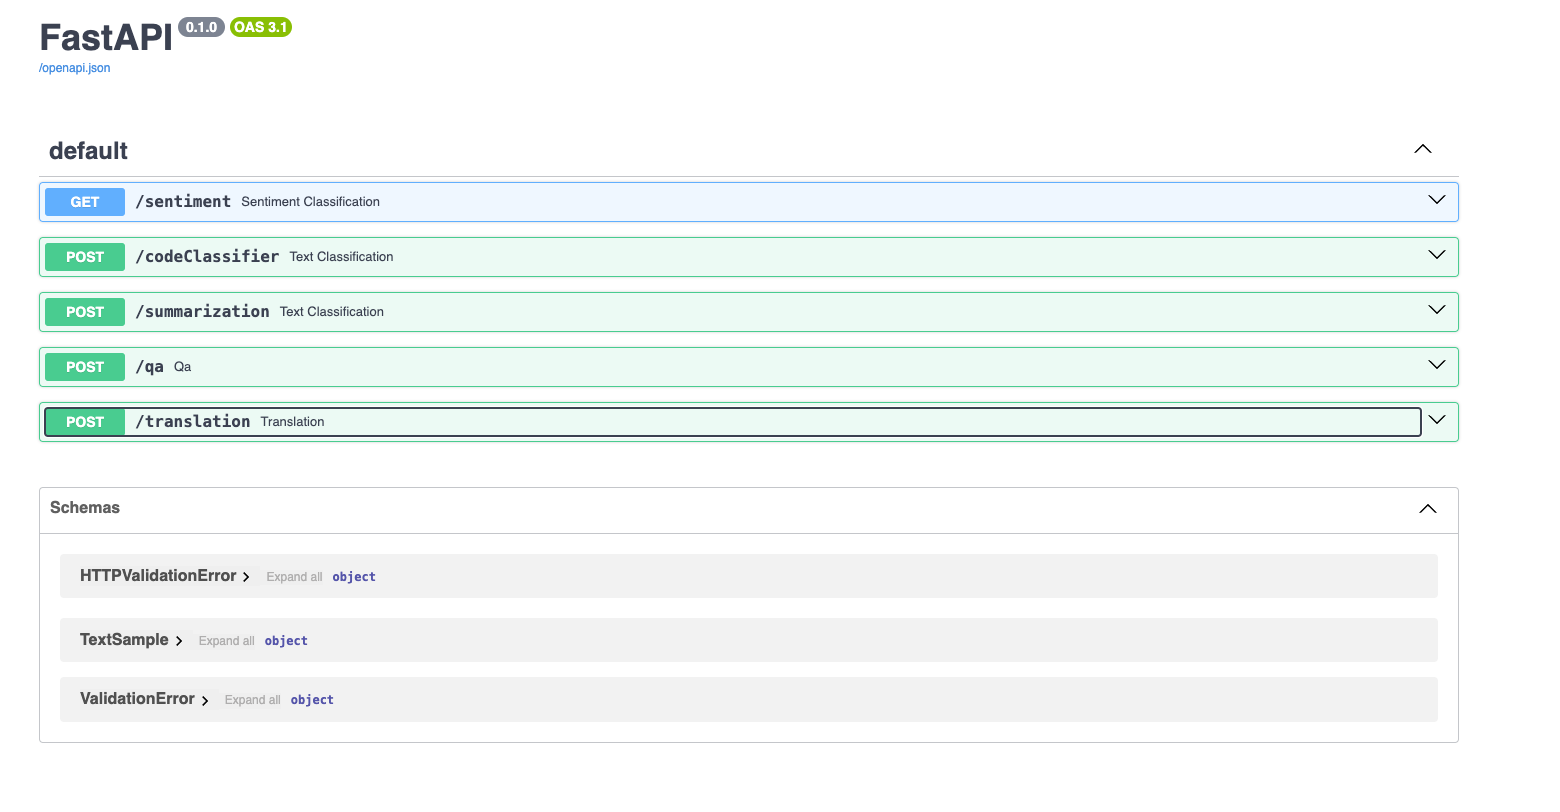

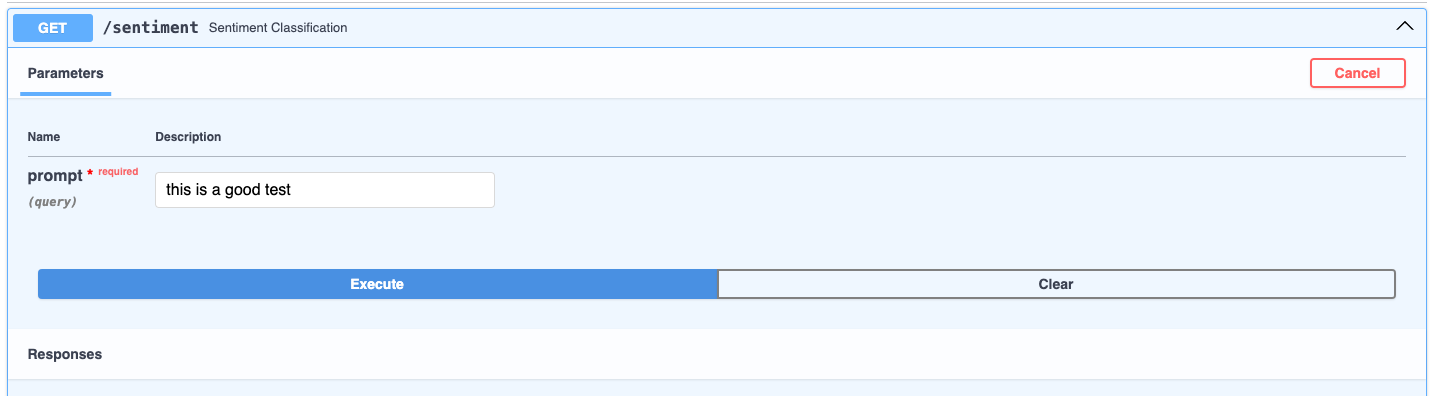

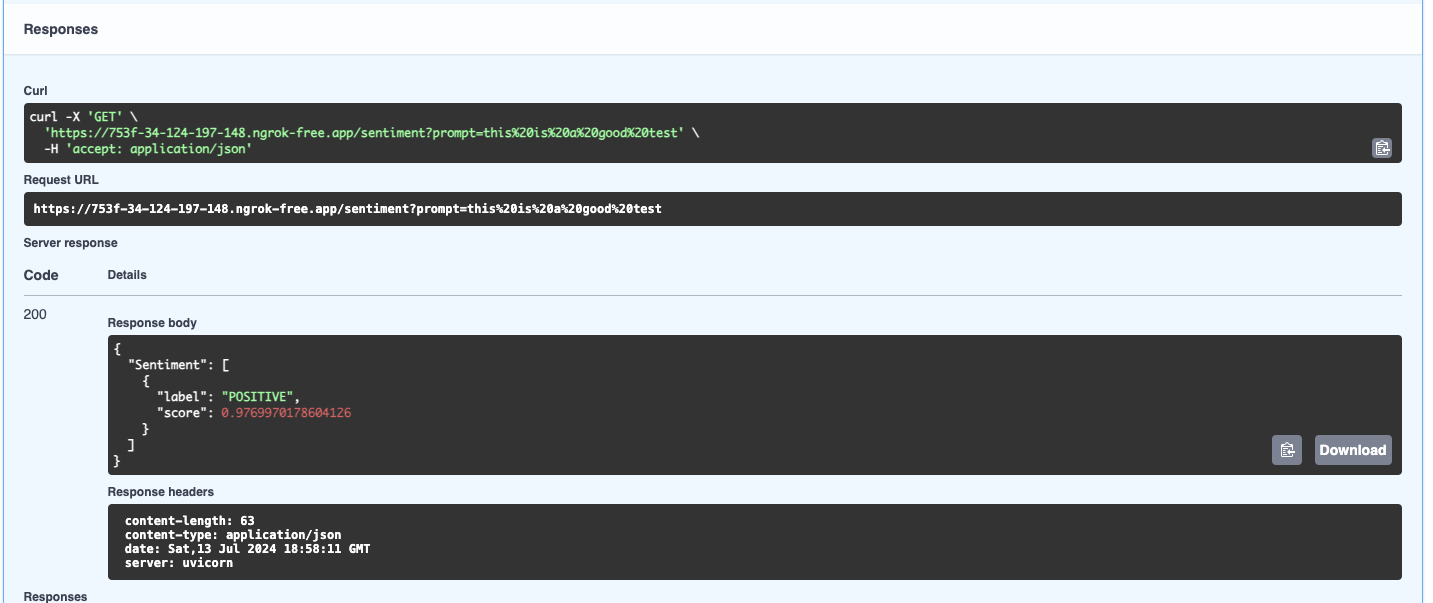

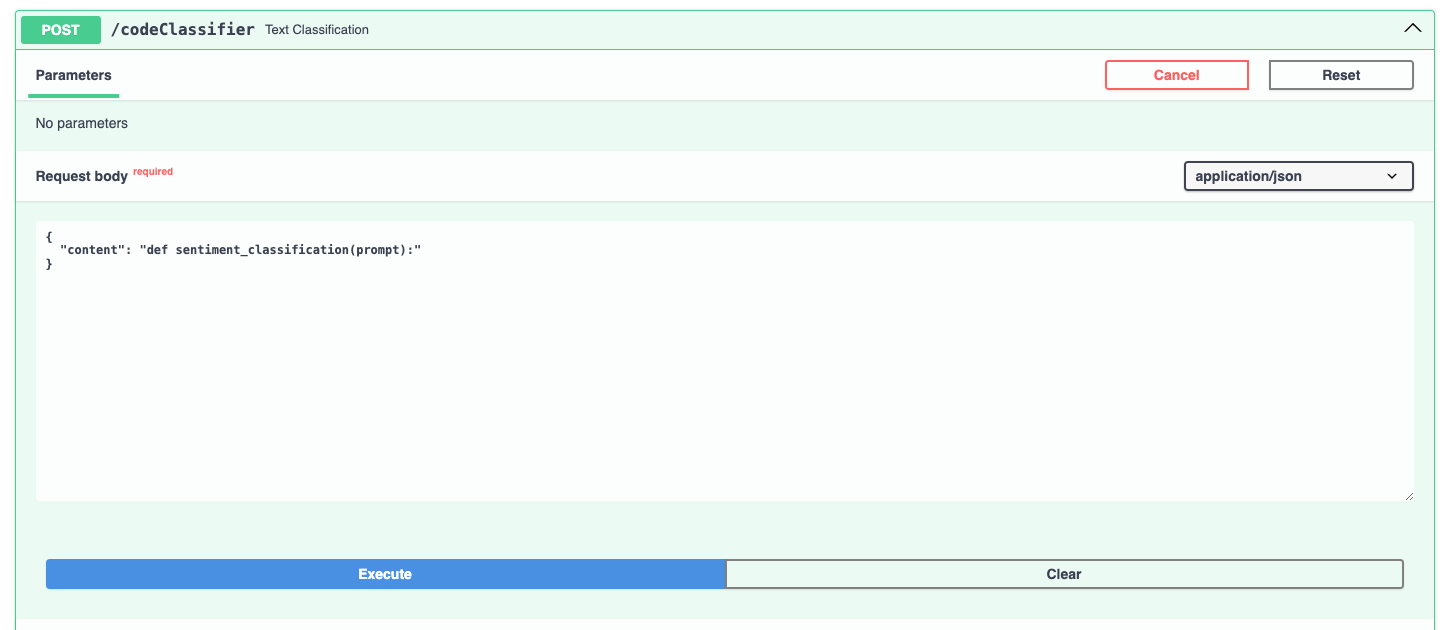

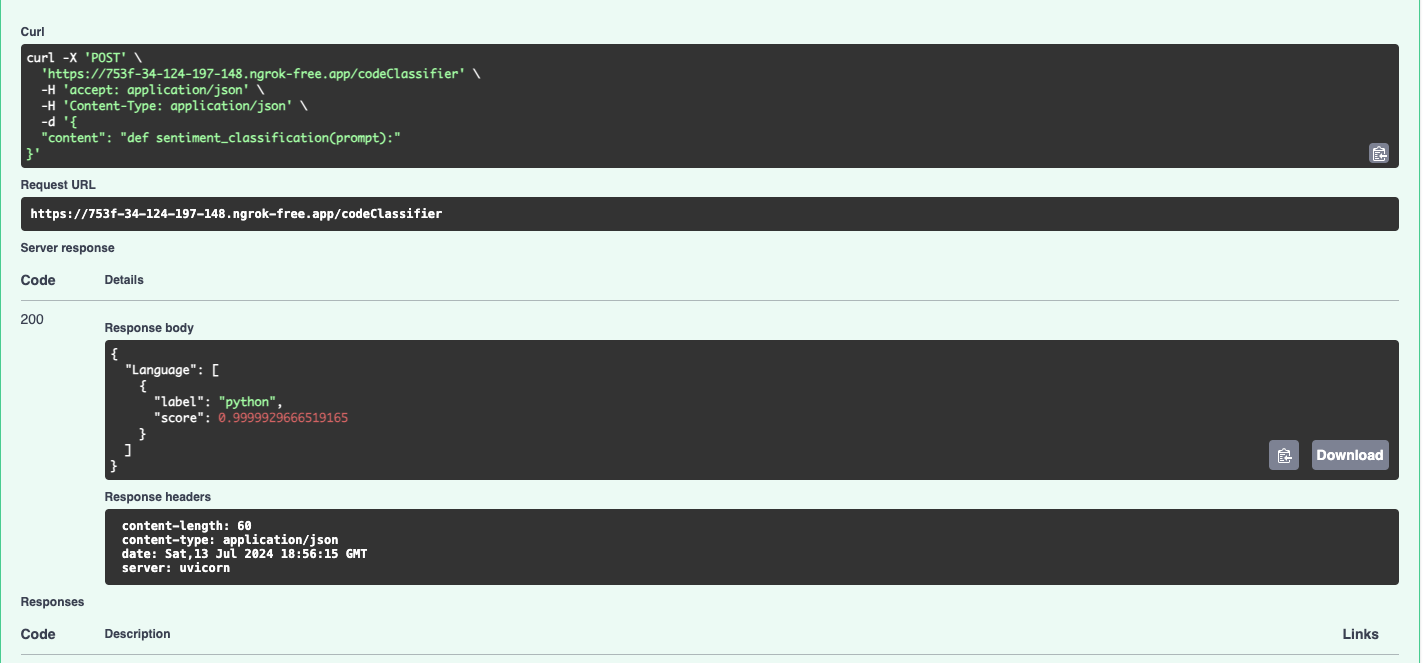

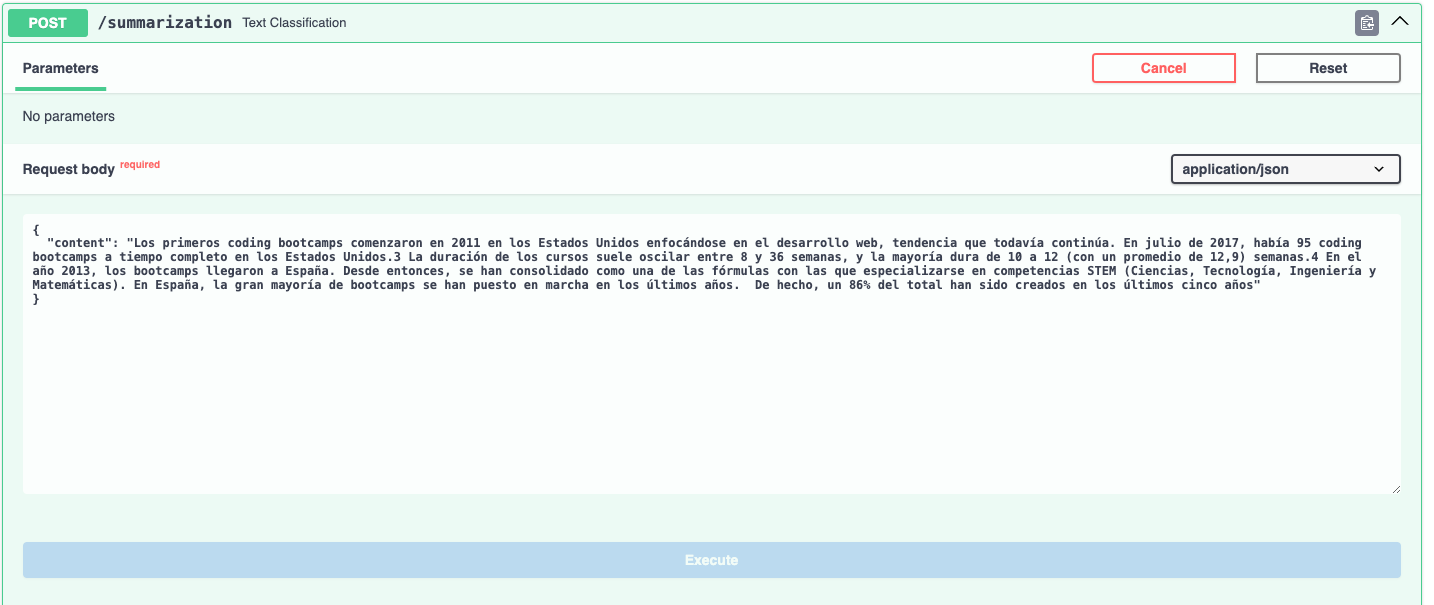

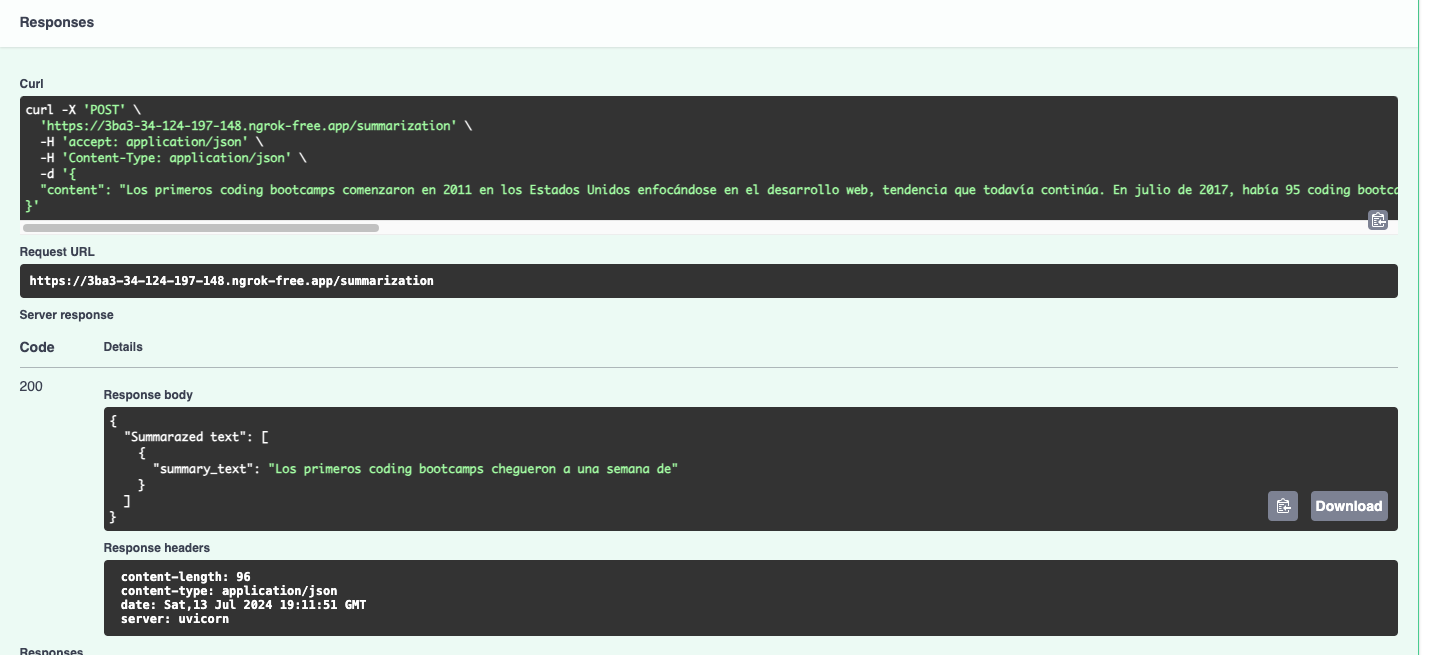

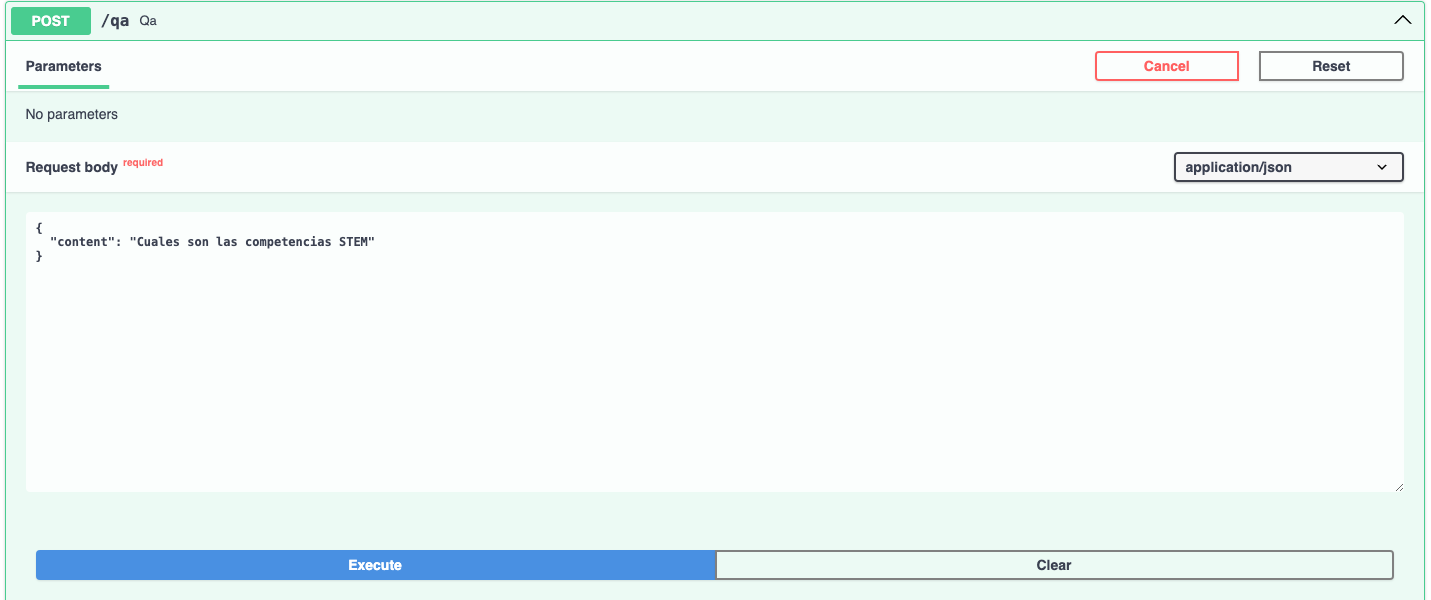

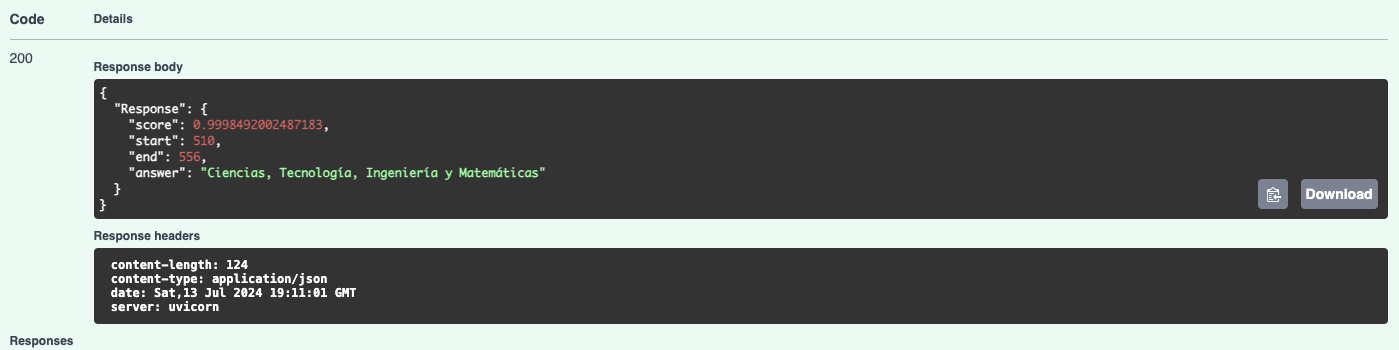

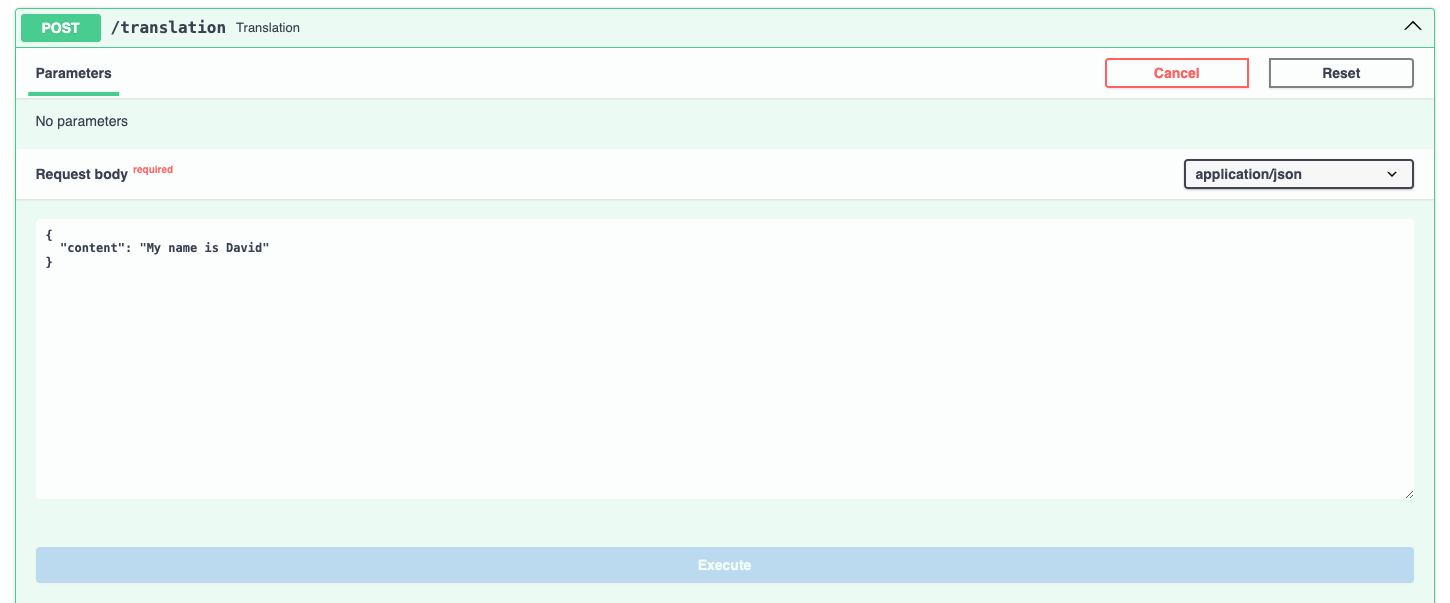

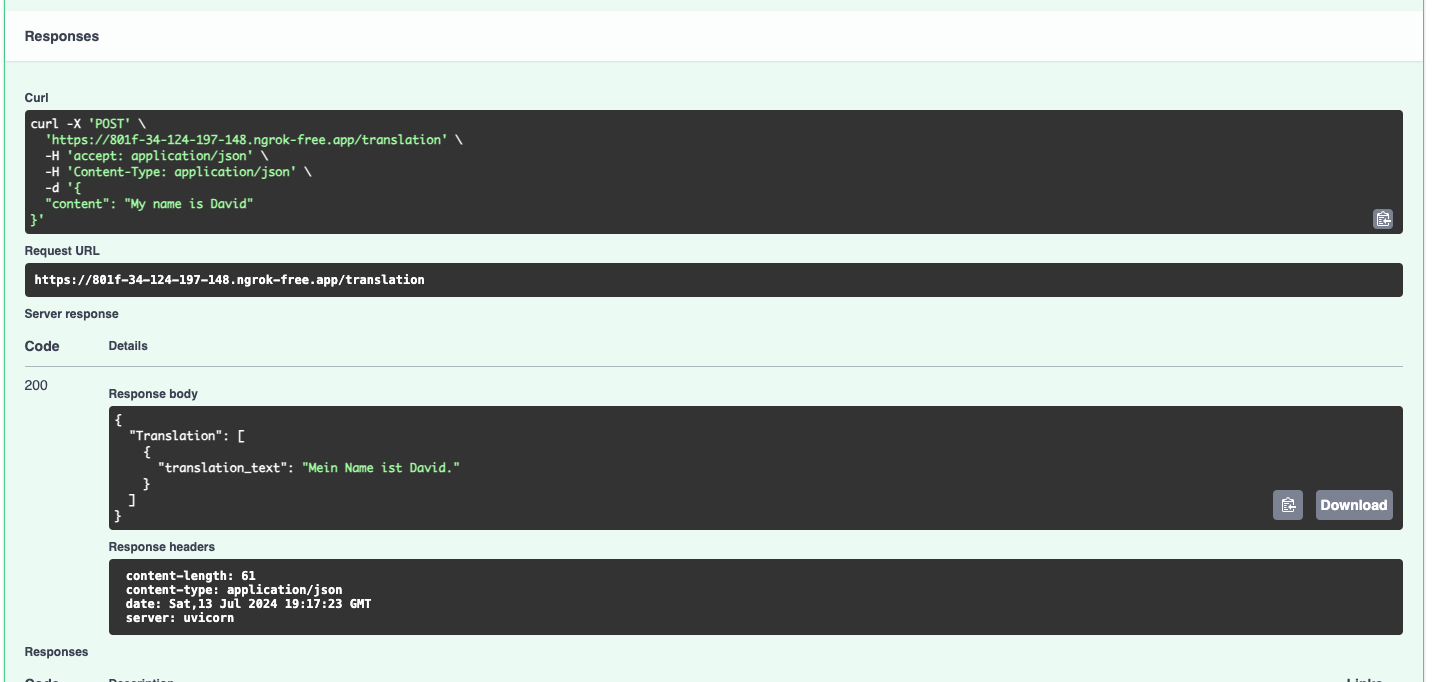